# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator. However, -60 is significantly different from 60. I believe that this is due to the earth's tilt at this time of year.

* Humidity seems to have no relationship with latitude. But I do find it interesting that humidity tends to cluster between  60 and 100%, meaning that very dry areas are the exception, regardless of latitude.

* There is no notable relationship between wind speed and latitude, or between cloudiness and latitude. 



## Dependencies and Setup

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from api_keys import api_key
from citipy import citipy
import warnings
warnings.filterwarnings('ignore')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

616

In [11]:
#pass list to dataframe and preview
cities_df = pd.DataFrame.from_records([cities])
cities_df = cities_df.transpose()
cities_df = cities_df.rename(columns={0:"City"})
cities_df.head()

,City
0,alofi
1,yellowknife
2,girne
3,port elizabeth
4,atuona


### Perform API Calls


In [12]:
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).
cities_weather=cities_df
url = "http://api.openweathermap.org/data/2.5/weather?"

row_count = 1

print("Beginning Work on Requests")
for index, row in cities_df.iterrows():
    target_city = row["City"]
    target_url = url + "appid=" + api_key + "&units=IMPERIAL" + "&q=" + target_city.replace(" ","+")
    city_data = requests.get(target_url).json()
    if city_data["cod"] == "404":
        print("Request not found, skipping...")

    else:
        cities_weather.set_value(index, "City", city_data["name"])
        cities_weather.set_value(index, "Country", city_data["sys"]["country"])
        cities_weather.set_value(index, "Temperature (F)", city_data["main"]["temp"])
        cities_weather.set_value(index, "Latitude", city_data["coord"]["lat"])
        cities_weather.set_value(index, "Longitude", city_data["coord"]["lon"])
        cities_weather.set_value(index, "Humidity (%)", city_data["main"]["humidity"])
        cities_weather.set_value(index, "Cloudiness (%)", city_data["clouds"]["all"])
        cities_weather.set_value(index, "Wind Speed (mph)", city_data["wind"]["speed"])
        
        print("------------------------")
        print("Proceesing: Request # " , row_count, ' | ' , city_data["name"], city_data["sys"]["country"])
        print(target_url)
        row_count += 1

Beginning Work on Requests
------------------------
Proceesing: Request #  1  |  Alofi NU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=alofi
------------------------
Proceesing: Request #  2  |  Yellowknife CA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=yellowknife
Request not found, skipping...
------------------------
Proceesing: Request #  3  |  Port Elizabeth US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=port+elizabeth
------------------------
Proceesing: Request #  4  |  Atuona PF
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=atuona
------------------------
Proceesing: Request #  5  |  Togur RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=togur
------------------------
Proceesing: Request #  6 

------------------------
Proceesing: Request #  46  |  Tura IN
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=tura
------------------------
Proceesing: Request #  47  |  Bluff AU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=bluff
------------------------
Proceesing: Request #  48  |  Severo-Kurilsk RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=severo-kurilsk
------------------------
Proceesing: Request #  49  |  Deder ET
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=deder
------------------------
Proceesing: Request #  50  |  Arraial do Cabo BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=arraial+do+cabo
------------------------
Proceesing: Request #  51  |  Komsomolskiy RU
http://api.openweathermap.or

------------------------
Proceesing: Request #  91  |  Saint-Joseph FR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=saint-joseph
------------------------
Proceesing: Request #  92  |  Sao Felix do Xingu BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=sao+felix+do+xingu
------------------------
Proceesing: Request #  93  |  Zapolyarnyy RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=zapolyarnyy
------------------------
Proceesing: Request #  94  |  Mascali IT
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=mascali
------------------------
Proceesing: Request #  95  |  San Quintin PH
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=san+quintin
------------------------
Proceesing: Request #  96  |  Busselton AU

------------------------
Proceesing: Request #  136  |  Hofn IS
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=hofn
------------------------
Proceesing: Request #  137  |  Le Pradet FR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=le+pradet
Request not found, skipping...
------------------------
Proceesing: Request #  138  |  Kirillov RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=kirillov
------------------------
Proceesing: Request #  139  |  San Ramon NI
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=san+ramon
------------------------
Proceesing: Request #  140  |  Los Llanos de Aridane ES
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=los+llanos+de+aridane
------------------------
Proceesing: Request # 

------------------------
Proceesing: Request #  181  |  Kaitangata NZ
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=kaitangata
------------------------
Proceesing: Request #  182  |  Vaitape PF
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=vaitape
------------------------
Proceesing: Request #  183  |  Port Hawkesbury CA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=port+hawkesbury
------------------------
Proceesing: Request #  184  |  Coahuayana MX
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=coahuayana
------------------------
Proceesing: Request #  185  |  Monroe US
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=monroe
------------------------
Proceesing: Request #  186  |  Provideniya RU
http://api.op

------------------------
Proceesing: Request #  226  |  Gat SN
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=gat
------------------------
Proceesing: Request #  227  |  Parasia IN
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=parasia
------------------------
Proceesing: Request #  228  |  Barcelona ES
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=barcelona
------------------------
Proceesing: Request #  229  |  Contamana PE
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=contamana
------------------------
Proceesing: Request #  230  |  Mazagao BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=mazagao
Request not found, skipping...
------------------------
Proceesing: Request #  231  |  Sturgeon Falls CA
http:

------------------------
Proceesing: Request #  271  |  Dogondoutchi NE
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=dogondoutchi
Request not found, skipping...
------------------------
Proceesing: Request #  272  |  Pevek RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=pevek
------------------------
Proceesing: Request #  273  |  Chalinze TZ
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=chalinze
------------------------
Proceesing: Request #  274  |  Iqaluit CA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=iqaluit
Request not found, skipping...
------------------------
Proceesing: Request #  275  |  Husavik CA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=husavik
------------------------
Proceesing: Req

------------------------
Proceesing: Request #  317  |  Bayan MN
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=bayan
------------------------
Proceesing: Request #  318  |  Marsa Matruh EG
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=marsa+matruh
------------------------
Proceesing: Request #  319  |  Baidyabati IN
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=baidyabati
------------------------
Proceesing: Request #  320  |  Yingcheng CN
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=yingcheng
------------------------
Proceesing: Request #  321  |  Augusto Correa BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=augusto+correa
------------------------
Proceesing: Request #  322  |  Isla Mujeres MX
http://a

------------------------
Proceesing: Request #  362  |  Eirunepe BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=eirunepe
Request not found, skipping...
------------------------
Proceesing: Request #  363  |  Yar-Sale RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=yar-sale
------------------------
Proceesing: Request #  364  |  Portobelo PA
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=portobelo
------------------------
Proceesing: Request #  365  |  Berlevag NO
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=berlevag
------------------------
Proceesing: Request #  366  |  Pozo Colorado PY
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=pozo+colorado
------------------------
Proceesing: Request #  367  |  T

------------------------
Proceesing: Request #  407  |  Olovyannaya RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=olovyannaya
------------------------
Proceesing: Request #  408  |  Grand-Santi GF
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=grand-santi
------------------------
Proceesing: Request #  409  |  Sirjan IR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=sirjan
------------------------
Proceesing: Request #  410  |  Katangli RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=katangli
------------------------
Proceesing: Request #  411  |  Mehamn NO
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=mehamn
------------------------
Proceesing: Request #  412  |  Palma BR
http://api.openweathermap.org/d

------------------------
Proceesing: Request #  455  |  San Lorenzo PY
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=san+lorenzo
------------------------
Proceesing: Request #  456  |  Koumac NC
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=koumac
------------------------
Proceesing: Request #  457  |  Maldonado UY
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=maldonado
------------------------
Proceesing: Request #  458  |  Manaure CO
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=manaure
------------------------
Proceesing: Request #  459  |  Preobrazheniye RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=preobrazheniye
------------------------
Proceesing: Request #  460  |  Kununurra AU
http://api.openwe

------------------------
Proceesing: Request #  500  |  Asyut EG
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=asyut
------------------------
Proceesing: Request #  501  |  Matadi CD
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=matadi
------------------------
Proceesing: Request #  502  |  Plavsk RU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=plavsk
------------------------
Proceesing: Request #  503  |  Bathsheba BB
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=bathsheba
------------------------
Proceesing: Request #  504  |  Bulata PH
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=bulata
------------------------
Proceesing: Request #  505  |  Kalamazoo US
http://api.openweathermap.org/data/2.5/weather?

------------------------
Proceesing: Request #  546  |  Saquarema BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=saquarema
------------------------
Proceesing: Request #  547  |  Palmares do Sul BR
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=palmares+do+sul
Request not found, skipping...
------------------------
Proceesing: Request #  548  |  Launceston AU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=launceston
------------------------
Proceesing: Request #  549  |  Flinders AU
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=flinders
------------------------
Proceesing: Request #  550  |  Mombetsu JP
http://api.openweathermap.org/data/2.5/weather?appid=924de882fad87c2864f771a725b6ae71&units=IMPERIAL&q=mombetsu
------------------------
Proceesing: Request #  5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
#check size
cities_weather.count()

City                616
Country             558
Temperature (F)     558
Latitude            558
Longitude           558
Humidity (%)        558
Cloudiness (%)      558
Wind Speed (mph)    558
dtype: int64

In [14]:
#Drop unfound cities
cities_weather=cities_weather.dropna()
cities_weather.count()

City                558
Country             558
Temperature (F)     558
Latitude            558
Longitude           558
Humidity (%)        558
Cloudiness (%)      558
Wind Speed (mph)    558
dtype: int64

In [15]:
#export to csv and display dataframe
cities_weather.to_csv("./output_data/cities_weather.csv")
cities_weather.head(10)

,City,Country,Temperature (F),Latitude,Longitude,Humidity (%),Cloudiness (%),Wind Speed (mph)
0,Alofi,NU,77.00,-19.06,-169.92,88.0,75.0,5.82
1,Yellowknife,CA,22.42,62.45,-114.38,73.0,75.0,3.36
3,Port Elizabeth,US,63.70,39.31,-74.98,82.0,1.0,16.11
4,Atuona,PF,82.16,-9.80,-139.03,100.0,0.0,14.00
5,Togur,RU,32.57,58.36,82.83,94.0,68.0,9.42
6,Cape Town,ZA,66.90,-33.93,18.42,82.0,0.0,5.82
7,Bredasdorp,ZA,71.17,-34.53,20.04,88.0,88.0,11.41
9,Jamestown,AU,65.19,-33.21,138.60,89.0,0.0,4.61
10,Karratha,AU,88.19,-20.74,116.85,35.0,0.0,11.88
11,Ushuaia,AR,51.80,-54.81,-68.31,76.0,40.0,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

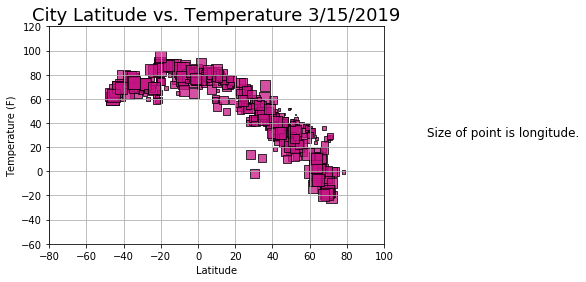

In [24]:
plt.scatter(cities_weather["Latitude"], 
            cities_weather["Temperature (F)"], c="mediumvioletred",
            s=cities_weather["Longitude"],
            edgecolor="black", linewidths=1, marker="s", 
            cmap='plasma', alpha=.75, label="City")

# Incorporate the other graph properties
# Note to TA's: I hardcoded the data, assuming that since I put the data into a CSV, it will not change. 
#Since there was no visible date I could see, I also assumed it was as of the day I retrieved it.
plt.title(f"City Latitude vs. Temperature 3/15/2019", fontsize=18, ha='center')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-60, 120])
plt.text(1, 0.5, "Size of point is longitude.", fontsize=12, transform=plt.gcf().transFigure)

# Save the figure
plt.savefig("./output_vizes/lat_temp.png")

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

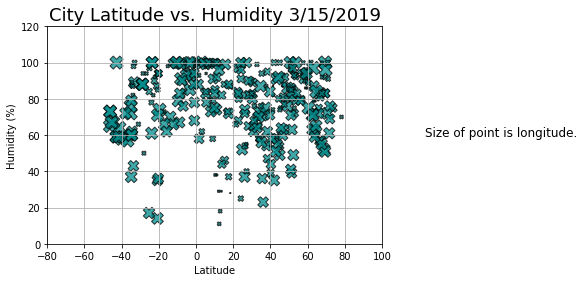

In [26]:
plt.scatter(cities_weather["Latitude"], 
            cities_weather["Humidity (%)"], c="darkcyan",
            s=cities_weather["Longitude"],
            edgecolor="black", linewidths=1, marker="X", 
            cmap='plasma', alpha=.75, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity 3/15/2019", fontsize=18, ha='center')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([0, 120])
plt.text(1, 0.5, "Size of point is longitude.", fontsize=12, transform=plt.gcf().transFigure)


# Save the figure
plt.savefig("./output_vizes/lat_humid.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

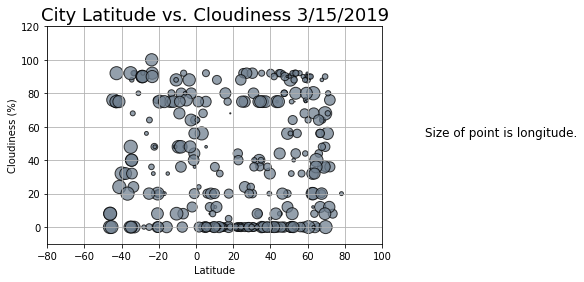

In [28]:
plt.scatter(cities_weather["Latitude"], 
            cities_weather["Cloudiness (%)"], c="slategray",
            s=cities_weather["Longitude"],
            edgecolor="black", linewidths=1, marker="o", 
            cmap='plasma', alpha=.75, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness 3/15/2019", fontsize=18, ha='center')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 120])
plt.text(1, 0.5, "Size of point is longitude.", fontsize=12, transform=plt.gcf().transFigure)

# Save the figure
plt.savefig("./output_vizes/lat_cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

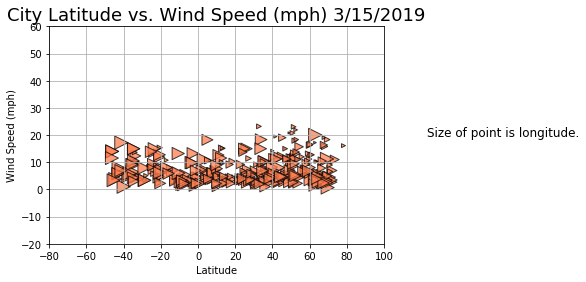

In [29]:
plt.scatter(cities_weather["Latitude"], 
            cities_weather["Wind Speed (mph)"], c="coral",
            s=cities_weather["Longitude"],
            edgecolor="black", linewidths=1, marker=">", 
            cmap='plasma', alpha=.75, label="City")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed (mph) 3/15/2019", fontsize=18, ha='center')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 60])
plt.text(1, 0.5, "Size of point is longitude.", fontsize=12, transform=plt.gcf().transFigure)

# Save the figure
plt.savefig("./output_vizes/lat_wind.png")

# Show plot
plt.show()